Data: https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s <br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def read_clean_data(filename):
    d = pd.read_csv(filename)[['title','artist','year','bpm', 'nrgy', 'dnce', 'dB','live', 'val', 'dur','acous', 'spch','pop']]
    d = d.rename({'bpm':'tempo','nrgy':'energy','dnce':'danceability','dB':'loudness','live':'liveness',
                  'val':'valence','dur':'duration','acous':'acousticness','spch':'speechiness','pop':'popularity'},
                 axis = 1)
    d['decade'] = filename[2:4] + 's'
    return d

### 1

In [2]:
filenames = ['1950.csv','1980.csv','2010.csv']

df = pd.concat([read_clean_data(i) for i in filenames]).reset_index()

df_id = df[["title","artist"]]

df = df.iloc[:,4:]

In [3]:
df.groupby('decade')['tempo'].count()

decade
10s    100
50s     73
80s    105
Name: tempo, dtype: int64

In [4]:
sns.set_context("talk")

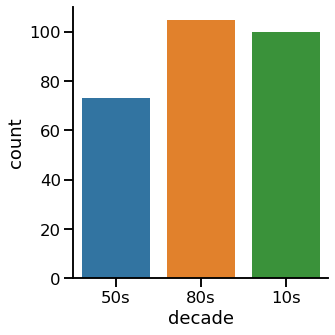

In [5]:
sns.catplot(x="decade",kind="count",data=df)

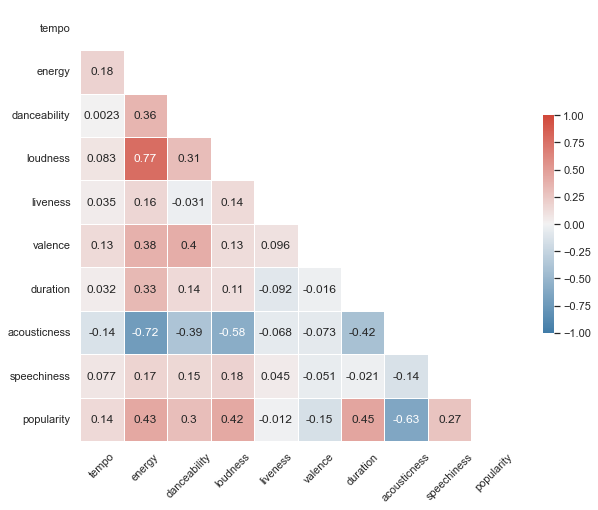

In [6]:
sns.set_theme(style="white")
sns.set_context("notebook")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(240,15,as_cmap=True)
plot=sns.heatmap(corr,mask=mask,vmax=1,vmin=-1,center=0,cmap=cmap,square=True,cbar_kws={"shrink":.5},
            linewidth=1,ax=ax,annot=True)
plot.tick_params(axis='x', rotation=45)

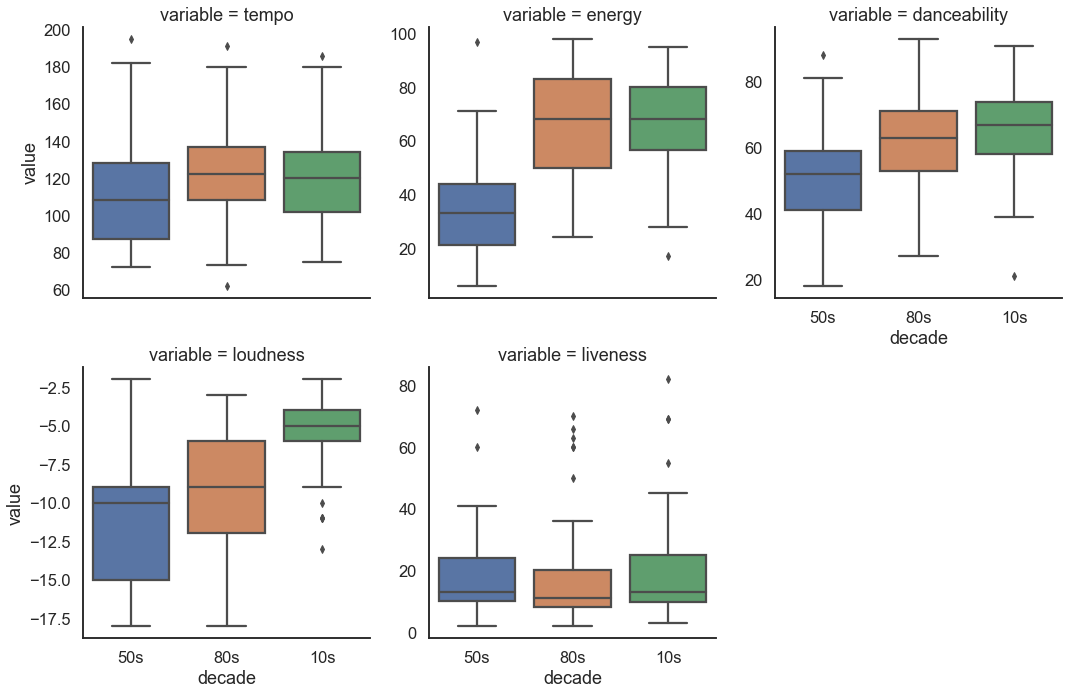

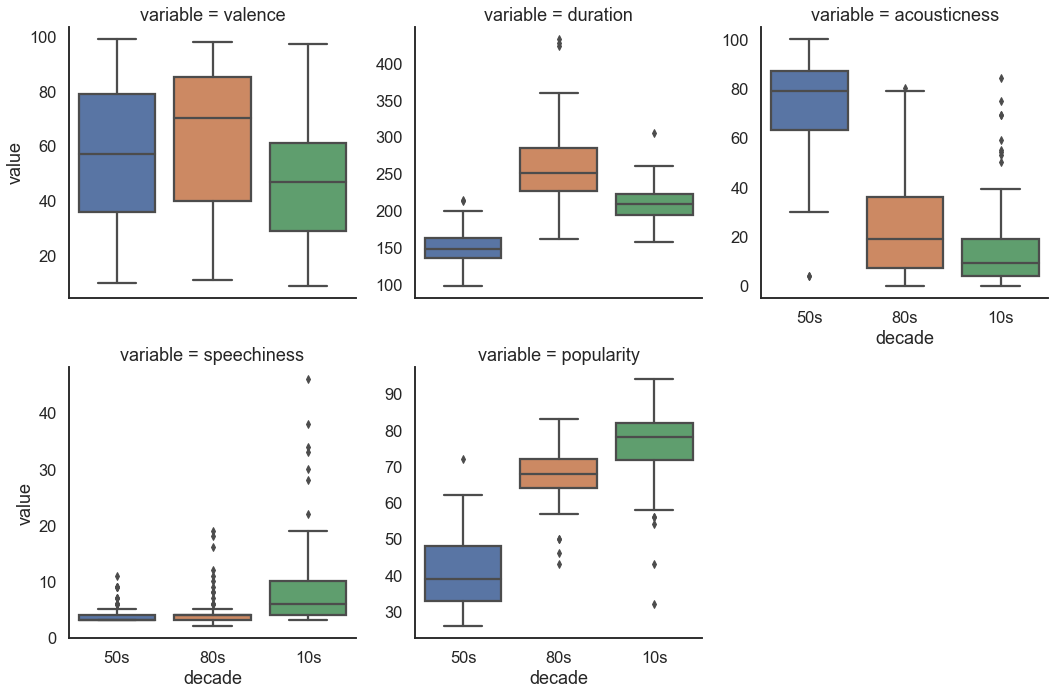

In [7]:
sns.set_context("talk")

df_long = df.iloc[:,:5]
df_long["decade"] = df.iloc[:,-1]
df_long = df_long.melt("decade")

sns.catplot(x="decade",y="value",data=df_long,col="variable",kind="box",col_wrap=3,sharey=False)


df_long = df.iloc[:,5:]
df_long = df_long.melt("decade")

sns.catplot(x="decade",y="value",data=df_long,col="variable",kind="box",col_wrap=3,sharey=False)

In [8]:
df_small = df.drop(columns=["tempo","liveness","valence"])

In [9]:
df.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
tempo,118.201439,25.296846,62.0,100.00,117.0,135.00,195.0
energy,58.125899,22.835987,6.0,41.25,60.5,78.75,98.0
danceability,60.435252,14.348717,18.0,51.00,62.0,71.00,93.0
loudness,-8.460432,3.952363,-18.0,-11.00,-8.0,-5.00,-2.0
liveness,17.417266,13.359186,2.0,9.00,13.0,22.00,82.0
valence,55.636691,25.027949,9.0,34.00,55.0,77.75,99.0
duration,212.309353,56.488566,98.0,174.25,210.0,245.00,433.0
acousticness,33.744604,31.073156,0.0,7.00,20.5,61.00,100.0
speechiness,5.805755,5.445997,2.0,3.00,4.0,6.00,46.0
popularity,63.629496,16.622897,26.0,54.00,68.0,76.00,94.0


In [10]:
summaries = df.groupby("decade").describe().unstack()
summaries = summaries.unstack(-2).reset_index(1).drop("count",axis=1)

## PCA

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter

def plot_pca(x_pca, exvar,title):    
    pc1 = str(round(100*exvar[0], 2))
    pc2 = str(round(100*exvar[1], 2))
    
    fig = plt.figure(figsize=(20, 9))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel("Principal Component 1 " + pc1 + "%") 
    ax.set_ylabel("Principal Component 2 " + pc2 + "%") 
    ax.set_title("2 component PCA" + f"   ({title})") 
    targets = ['50s',  '80s', '10s']
    colors = ['tab:blue', 'tab:orange', 'tab:green',]
    for target, color in zip(targets,colors):
        indicesToKeep = x_pca['key'] == target
        ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
                   , x_pca.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 200
                   , alpha = 0.6)
    ax.legend(targets)
    ax.grid()
    
def do_pca(df, standartize = False,title=""):
    x = df.loc[:, df.columns[:-1]].values
    y = df.loc[:,['decade']].values
    if standartize:
        x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)

    pca = PCA()
    x_pca = pca.fit_transform(x)
    x_pca = pd.DataFrame(x_pca)

    exvar = pca.explained_variance_ratio_
    explained =  pd.DataFrame(
        {"explained":exvar, "PC":["PC"+str(i) for i in range(1, len(exvar)+1)]})
    print(explained)
    
    fig = plt.figure(figsize=(10, 6)) 
    ax = fig.add_subplot(1,1,1) 
    ax=sns.barplot(x="PC",y="explained",data=explained,ax=ax)
    ax.set_ylabel("Variance explained")
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    x_pca['key']= y
    names = ["PC" + str(i) for i in range(len(x_pca.columns)-1)]
    names.append("key")
    x_pca.columns = names
    
    plot_pca(x_pca, exvar,title)

#### not standartized

   explained    PC
0   0.544206   PC1
1   0.174989   PC2
2   0.099760   PC3
3   0.088924   PC4
4   0.030999   PC5
5   0.022688   PC6
6   0.019487   PC7
7   0.014442   PC8
8   0.003793   PC9
9   0.000711  PC10


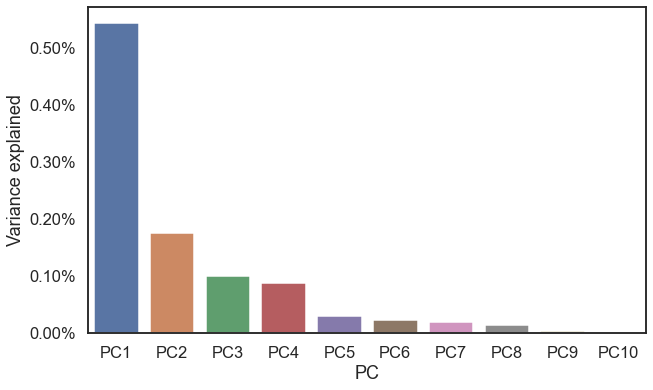

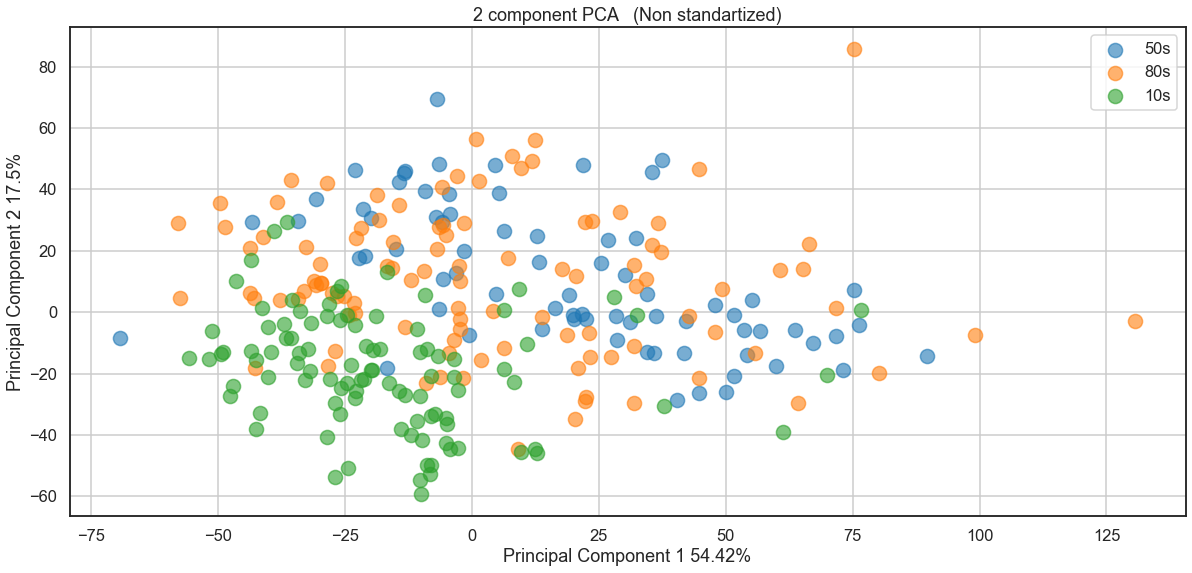

In [12]:
do_pca(df, False,"Non standartized")

#### standartized

   explained    PC
0   0.337480   PC1
1   0.143207   PC2
2   0.113602   PC3
3   0.099926   PC4
4   0.098788   PC5
5   0.075557   PC6
6   0.058234   PC7
7   0.032233   PC8
8   0.030074   PC9
9   0.010899  PC10
   explained   PC
0   0.469605  PC1
1   0.153316  PC2
2   0.133287  PC3
3   0.110771  PC4
4   0.067554  PC5
5   0.044144  PC6
6   0.021323  PC7


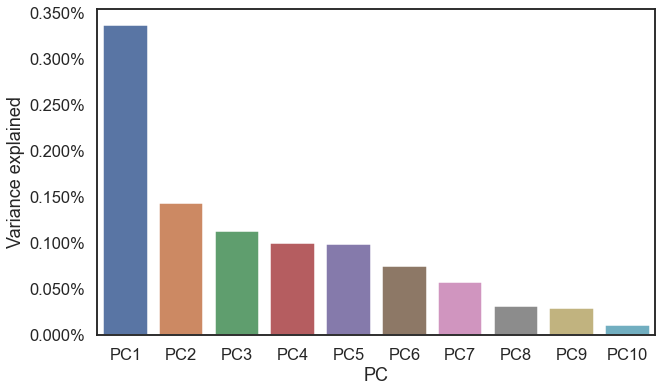

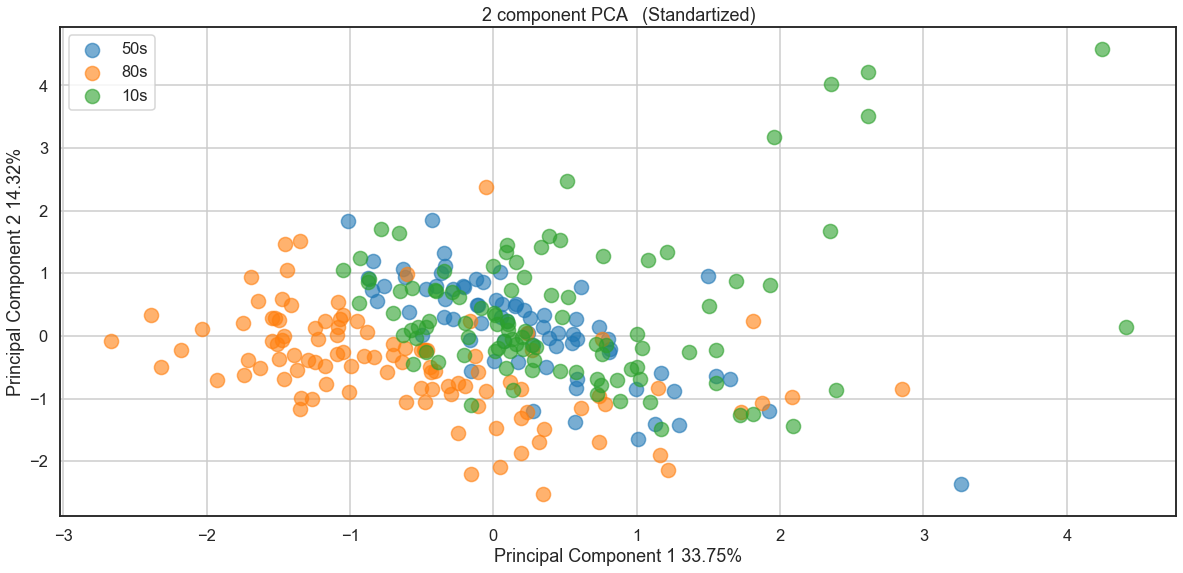

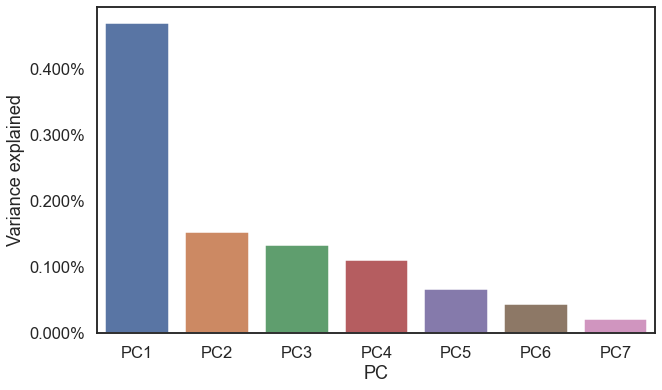

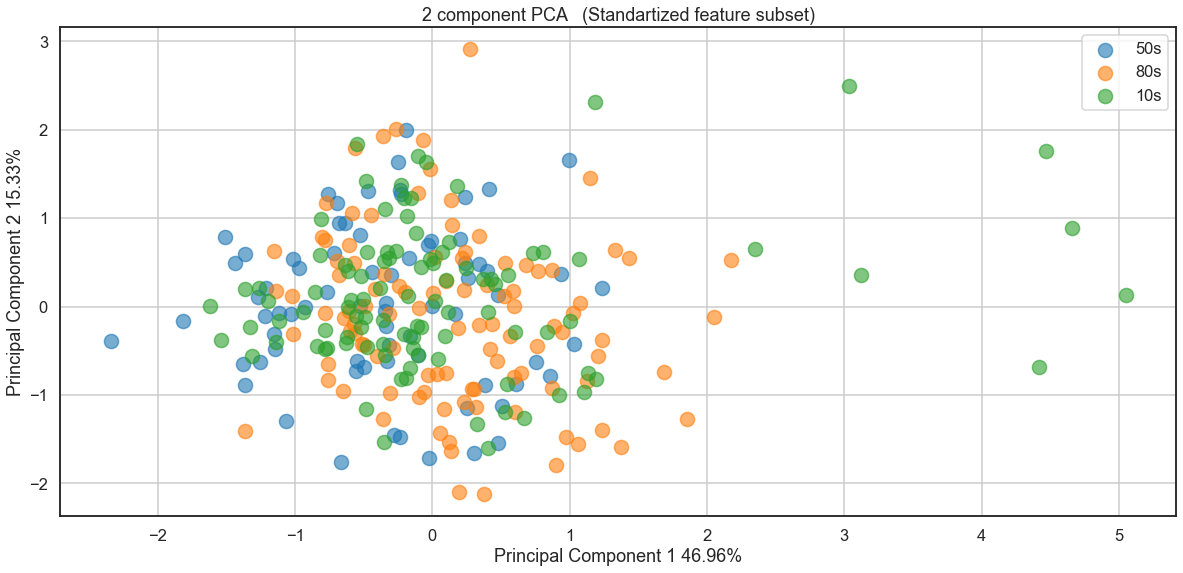

In [18]:
do_pca(df, True, "Standartized")

do_pca(df_small,True, "Standartized feature subset")

   explained   PC
0   0.240876  PC1
1   0.163326  PC2
2   0.155238  PC3
3   0.141294  PC4
4   0.131372  PC5
5   0.100620  PC6
6   0.067274  PC7


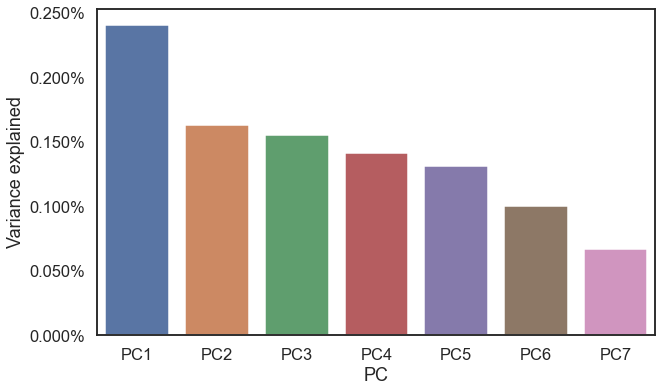

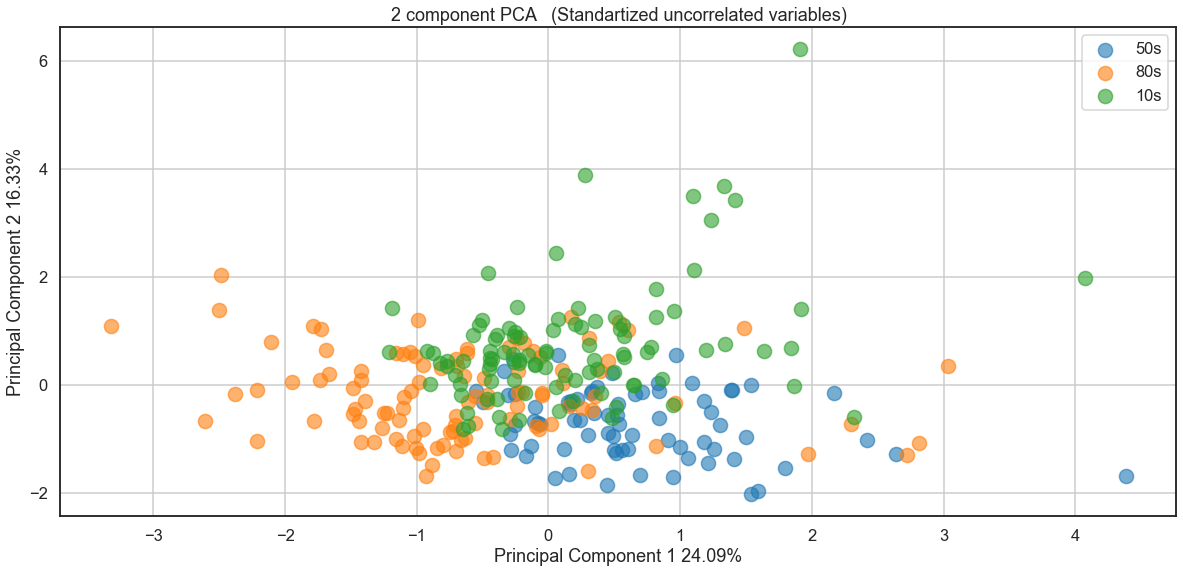

In [24]:
do_pca(df.drop(columns=["acousticness","energy","popularity"]), True, "Standartized uncorrelated variables")

## MDS

In [72]:
from sklearn.manifold import MDS 
from sklearn.metrics import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.manifold import smacof

def plot_mds(df,title):
    fig = plt.figure(figsize=(20, 9))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel("MDS1") 
    ax.set_ylabel("MDS2") 
    ax.set_title("2 dimensional MDS" + f"   ({title})") 
    targets = ['50s',  '80s', '10s']
    colors = ['tab:blue', 'tab:orange', 'tab:green',]
    for target, color in zip(targets,colors):
        indicesToKeep = df['key'] == target
        ax.scatter(df.loc[indicesToKeep, 'MDS1']
                    , df.loc[indicesToKeep, 'MDS2']
                    , c = color
                    , s = 200
                    , alpha = 0.6)
    ax.legend(targets)
    ax.grid()
    
def do_mds(df, standartize = False,metric=True,precomputed=False,title=""):
    mds=MDS(n_components=2, 
          metric=metric, 
          n_init=4, 
          max_iter=1000, 
          verbose=0, 
          eps=10e-6, 
          n_jobs=None, 
          random_state = 1000,
          dissimilarity='euclidean')
    
    x = df.loc[:, df.columns[:-1]].values
    y = df.loc[:,['decade']].values
    if standartize:
        x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)
    if not precomputed:
        x_mds = mds.fit_transform(x)
        stress = round(mds.stress_,0)
        n_iter = mds.n_iter_
    else:
        pca = PCA(n_components = 2)
        init_pca = pca.fit_transform(x)
        dist = pairwise_distances(init_pca,metric="euclidean")
        x_mds, stress, n_iter = smacof(dist, n_components = 2, init=init_pca,
                                       return_n_iter=True, eps=10e-06, max_iter=1000)

    x_mds = pd.DataFrame(x_mds,columns=["MDS1","MDS2"])

    print('Iterations: ',n_iter)
    print('Stress: ', stress)
    
    x_mds["key"] = y
    
    plot_mds(x_mds,title)

#### not standartized

Iterations:  417
Stress:  14672338.0


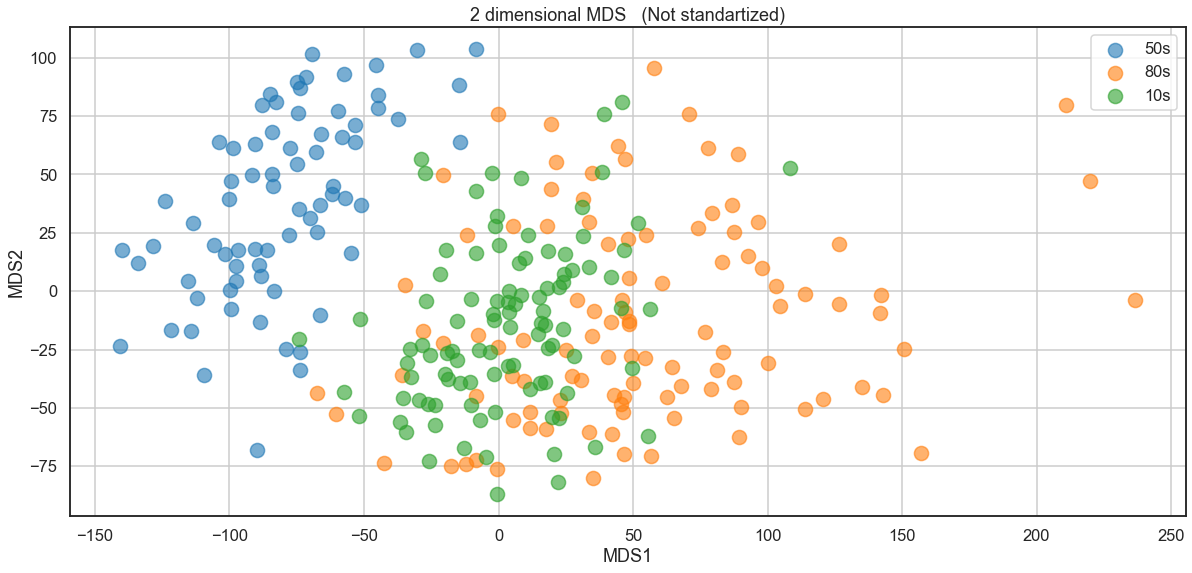

In [73]:
do_mds(df, False, title = "Not standartized")

#### standartized

Iterations:  3
Stress:  1735.0


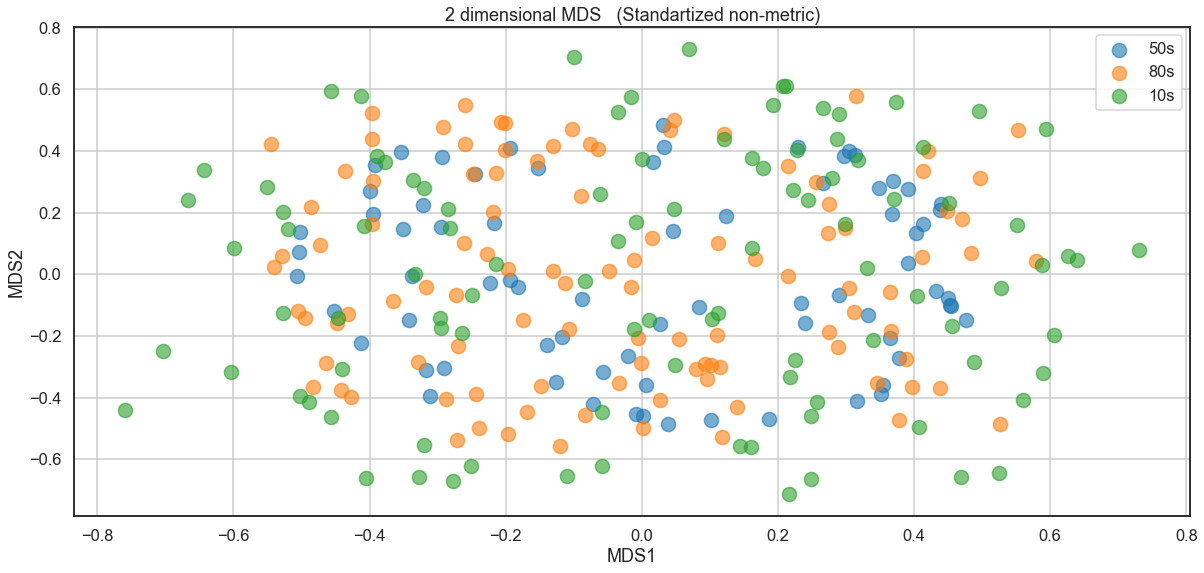

In [70]:
do_mds(df, True, False, title = "Standartized non-metric")

Iterations:  379
Stress:  45805.0


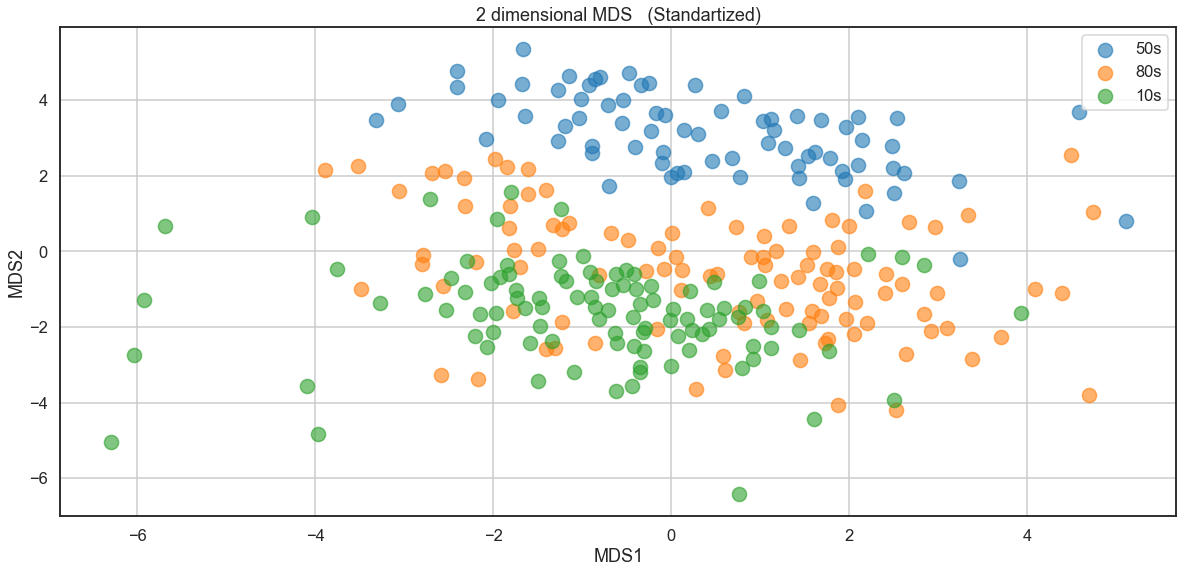

In [76]:
do_mds(df, True, title = "Standartized")

C:\Users\dovyd\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:240: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


Iterations:  2
Stress:  3.5446564442977616e-26


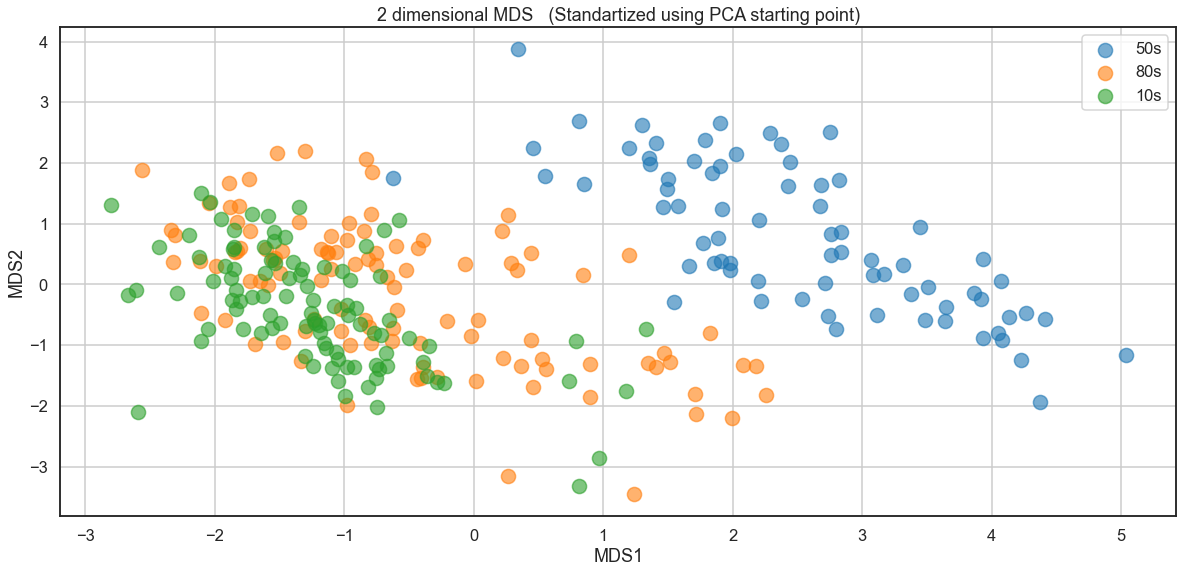

In [74]:
do_mds(df, True, precomputed=True, do_pca=True, title = "Standartized using PCA starting point")

Iterations:  543
Stress:  18942.0


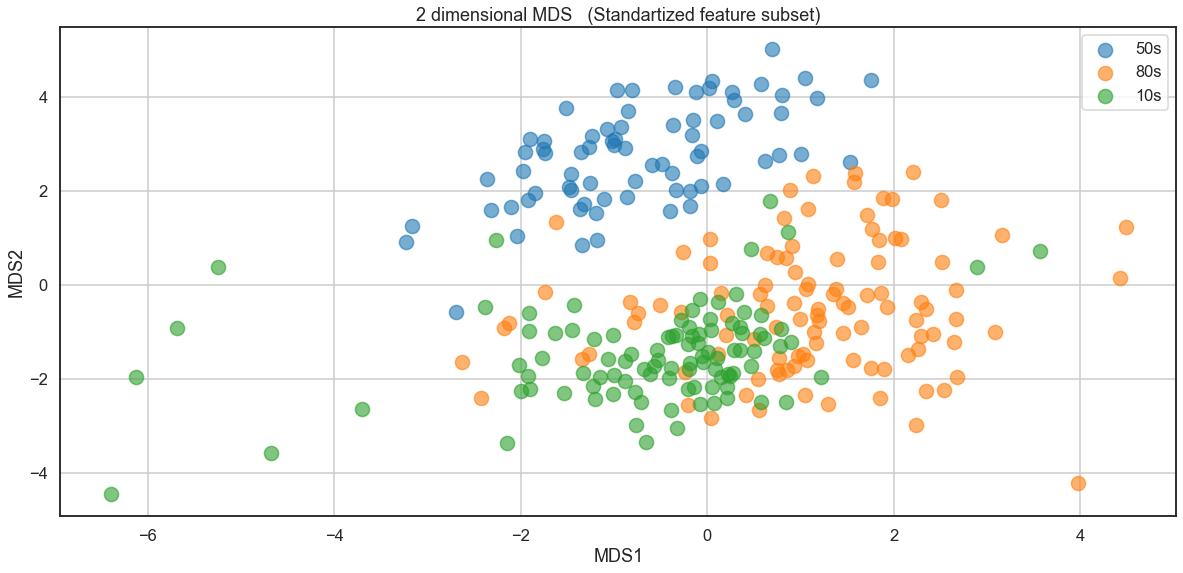

In [77]:
do_mds(df_small, True, title = "Standartized feature subset")

## t-SNE

In [80]:
from sklearn.manifold import TSNE


def plot_tsne(df,perplexity,ax = None,title=""):
    if ax is None:
        fig = plt.figure(figsize=(20, 9))
        ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel("t-SNE1") 
    ax.set_ylabel("t-SNE2") 
    ax.set_title(title + " "  + f"(perplexity={perplexity})") 
    targets = ['50s',  '80s', '10s']
    colors = ['tab:blue', 'tab:orange', 'tab:green',]
    for target, color in zip(targets,colors):
        indicesToKeep = df['key'] == target
        ax.scatter(df.loc[indicesToKeep, 't-SNE1']
                    , df.loc[indicesToKeep, 't-SNE2']
                    , c = color
                    , s = 200
                    , alpha = 0.6)
    ax.legend(targets)
    ax.grid()
    
    
def do_tsne(df, standartize = False,perplexity=30,n_iter=1000,init="random",**kwargs):
    tsne=TSNE(n_components=2, 
          perplexity = perplexity,
          n_iter=n_iter,
          random_state = 1000,
          verbose=0,
          init = init)
    
    x = df.loc[:, df.columns[:-1]].values
    y = df.loc[:,['decade']].values
    if standartize:
        x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)
    
    x_tsne = tsne.fit_transform(x)
    x_tsne = pd.DataFrame(x_tsne)

    print('Iterations: ', tsne.n_iter_)
    print('kl divergence: ', tsne.kl_divergence_)
    
    x_tsne.columns = ["t-SNE1","t-SNE2"]
    x_tsne["key"] = y
    
    plot_tsne(x_tsne,perplexity,**kwargs)

Iterations:  1949
kl divergence:  0.7048357129096985
Iterations:  1049
kl divergence:  0.7678862810134888


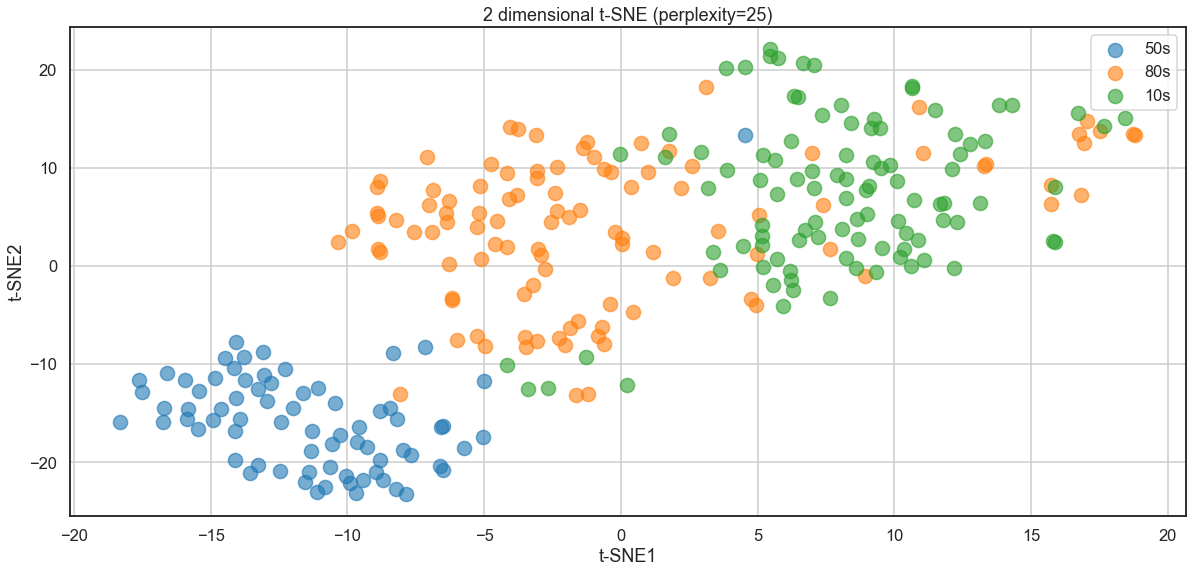

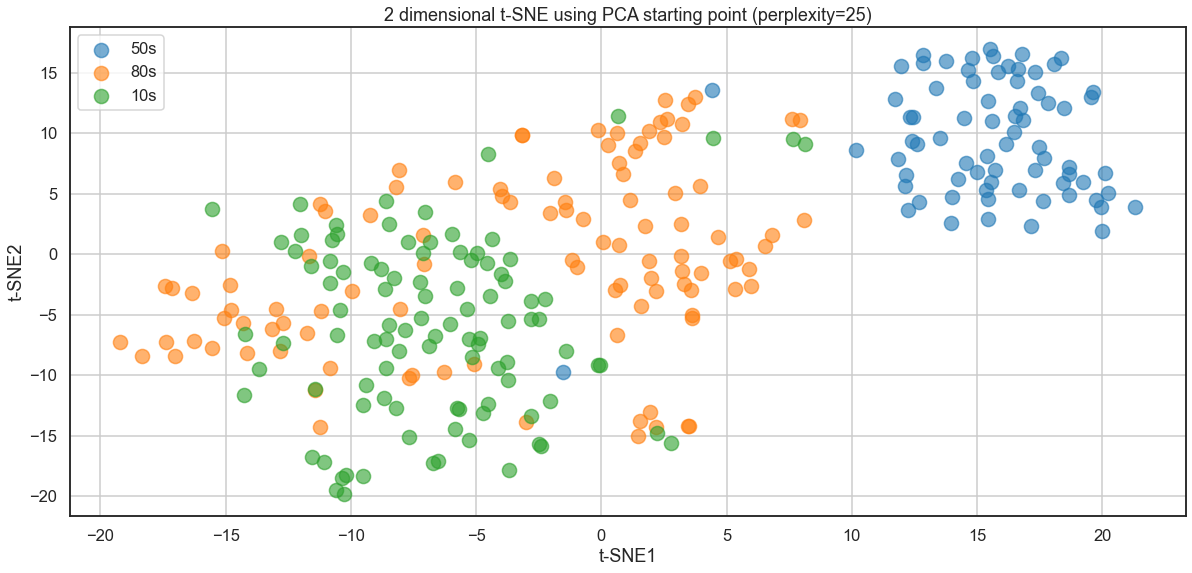

In [84]:
for i in [25]: 
    do_tsne(df, True,i,8000,title="2 dimensional t-SNE")
    do_tsne(df, True,i,8000, init="pca", title="2 dimensional t-SNE using PCA starting point")

Iterations:  899
kl divergence:  0.566978931427002
Iterations:  949
kl divergence:  0.4980314373970032
Iterations:  1099
kl divergence:  0.456636518239975
Iterations:  1099
kl divergence:  0.3895695209503174
Iterations:  1149
kl divergence:  0.35335925221443176
Iterations:  849
kl divergence:  0.30131885409355164


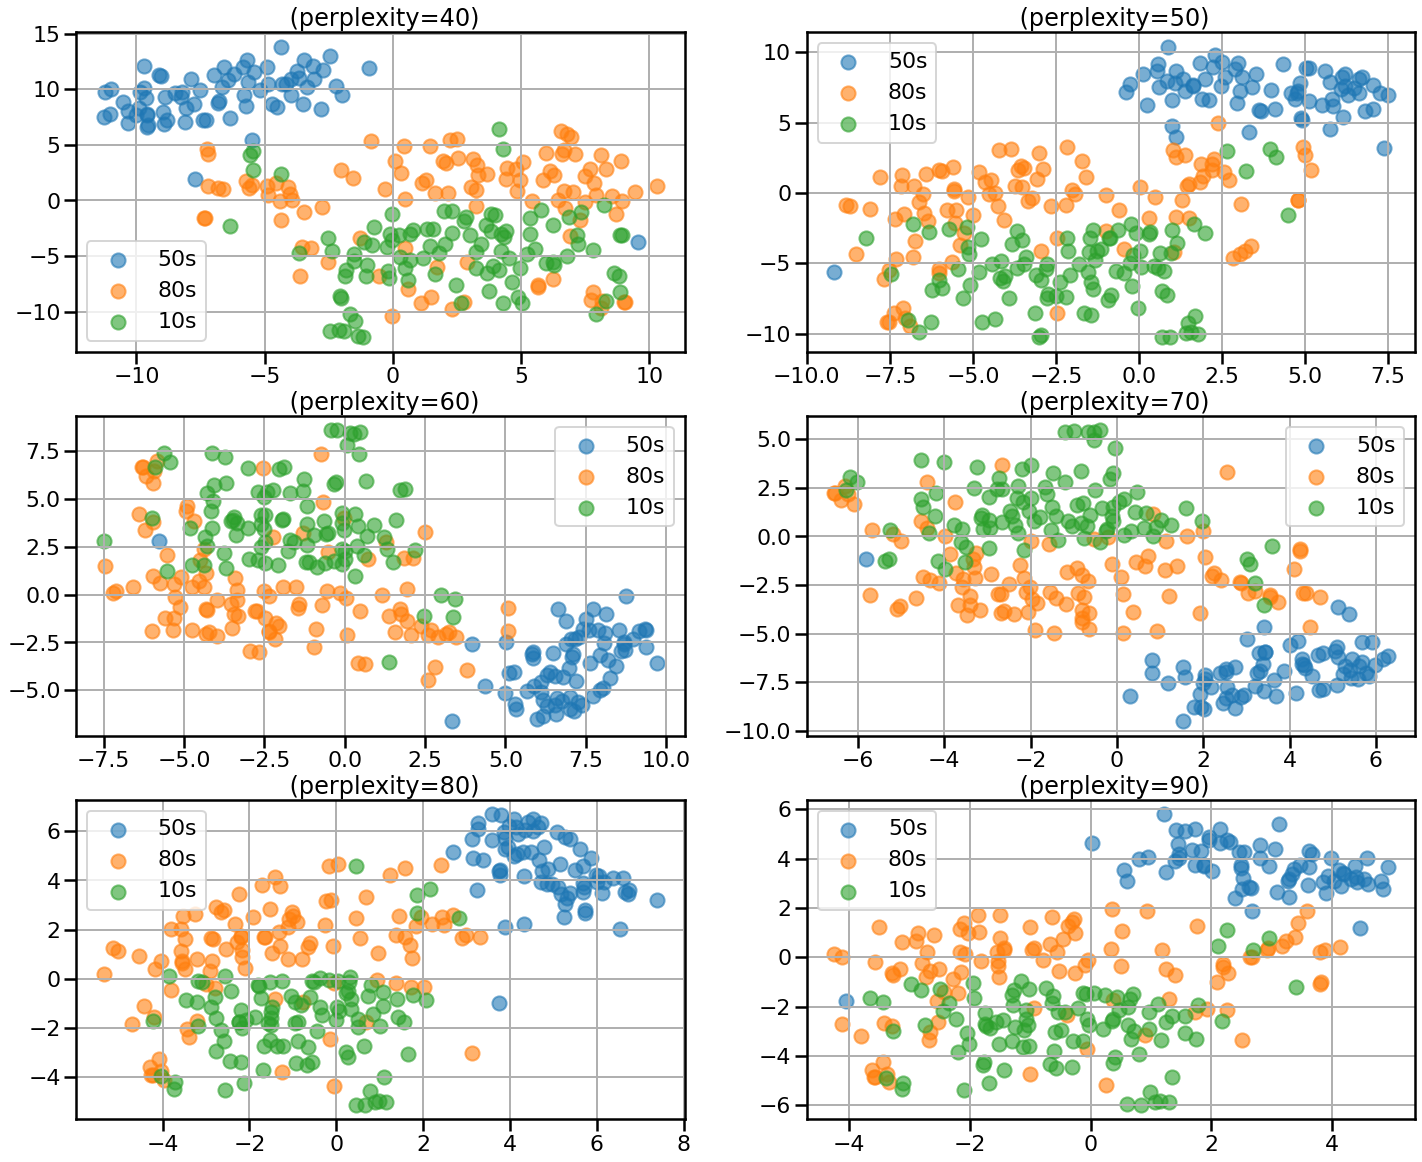

In [63]:
sns.set_context("poster")
fig, ax = plt.subplots(3,2,figsize=(24, 20))
ax = ax.flatten()
for i,j in enumerate([40,50,60,70,80,90]):
    do_tsne(df, True,j,8000,ax=ax[i])
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

Iterations:  1349
kl divergence:  0.6123780012130737
Iterations:  1699
kl divergence:  0.5486001968383789
Iterations:  949
kl divergence:  0.48931175470352173


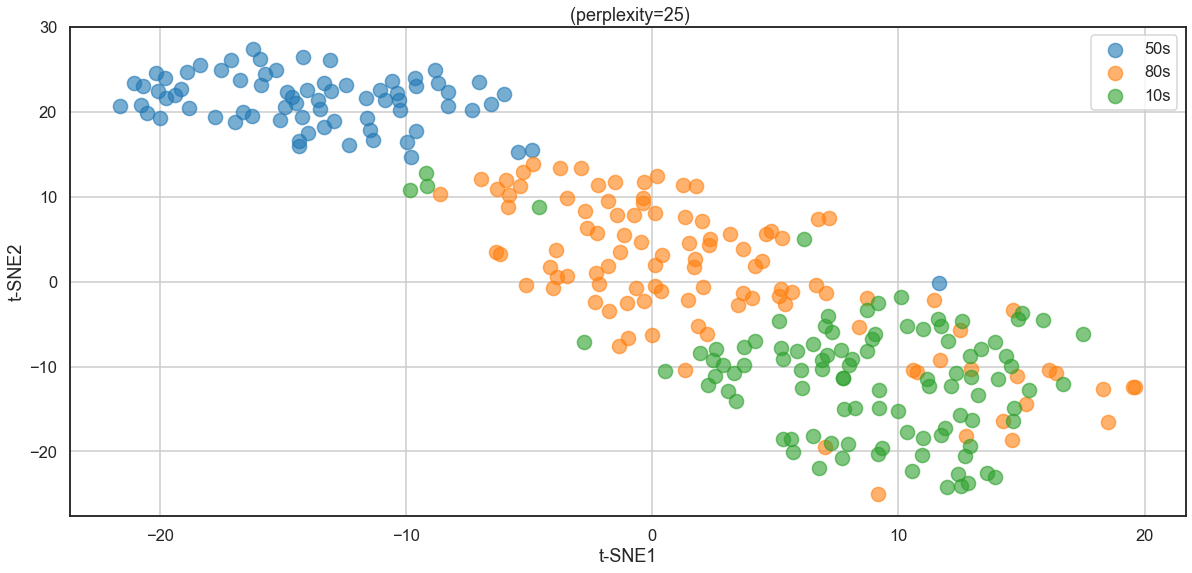

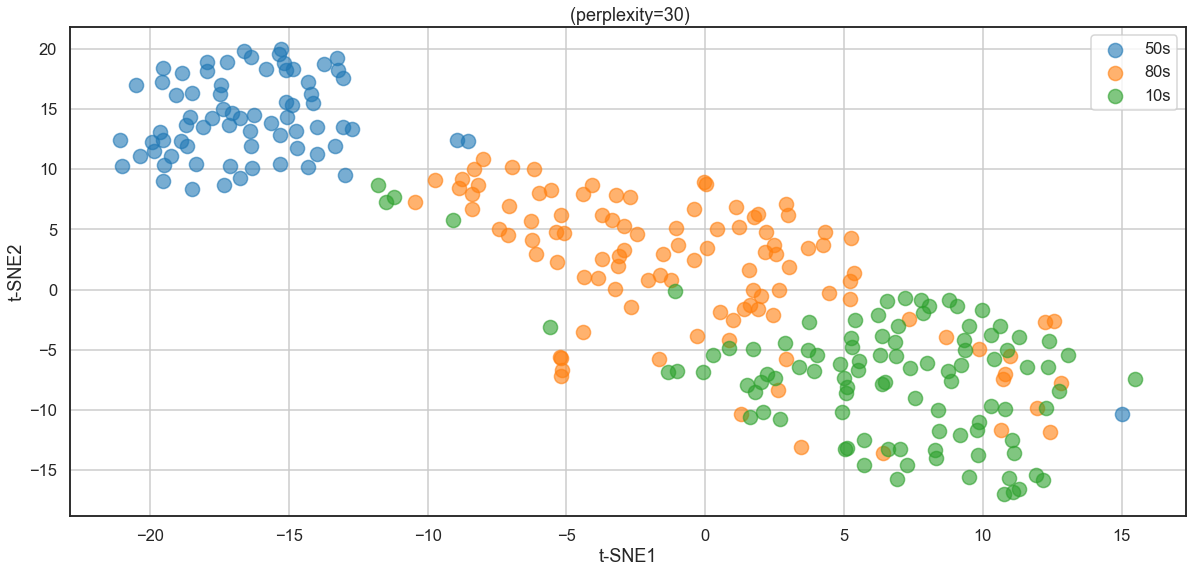

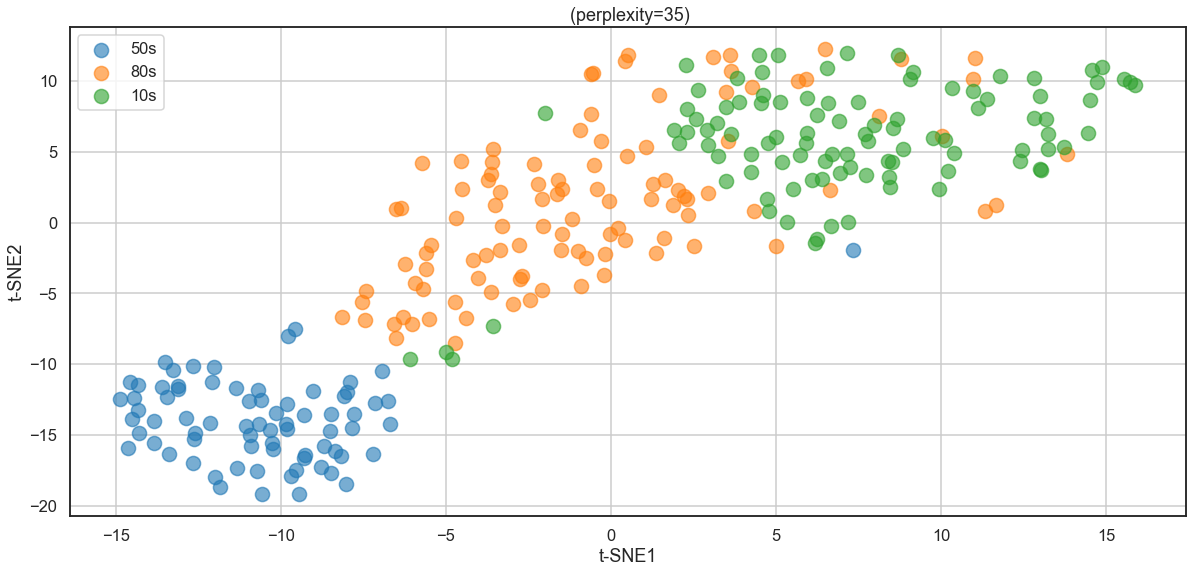

In [85]:
sns.set_context("talk")
for i in [25,30,35]:
    do_tsne(df_small, True,i,8000)